In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Example
#Dataset
#https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/classification_2classes.csv
#https://www.kaggle.com/msjaiclub/2classclassification
df = pd.read_csv('https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/classification_2classes.csv')
df

,X,Y,Label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


<function matplotlib.pyplot.show(close=None, block=None)>

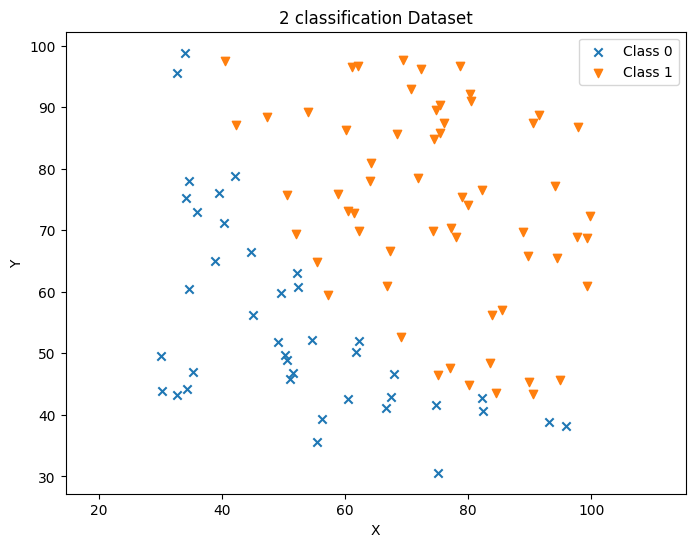

In [3]:
#Plot
group0 = df[df['Label']==0]
group1 = df[df['Label']==1]

plt.figure(figsize=(8,6))
plt.title('2 classification Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.scatter(group0.X,group0.Y,marker = 'x',label = 'Class 0')
plt.scatter(group1.X,group1.Y,marker = 'v',label = 'Class 1')
plt.legend(loc='upper right')
plt.show

In [4]:
#Data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x = df[['X','Y']].values
y = df['Label'].values

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.1,random_state = 0)

In [5]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (90, 2)
y_train shape (90,)
X_test shape (10, 2)
y_test shape (10,)


In [6]:
#Build neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten

#create neural network-logistic model
modelNN_logistic = Sequential()
modelNN_logistic.add(Dense(1,input_shape=(x_train.shape[1],), activation='sigmoid'))
print('Neural network-logistic model')
modelNN_logistic.summary()
print('*'*100)


#create neural  model
modelNN = Sequential()
modelNN.add(Dense(10,input_shape=(x_train.shape[1],), activation='relu'))
modelNN.add(Dense(8, activation='relu'))
modelNN.add(Dense(5, activation='relu'))
modelNN.add(Dense(1, activation='sigmoid'))
print('Neural network model')
modelNN.summary()

Neural network-logistic model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
****************************************************************************************************
Neural network model
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)    

In [7]:
#Build neural network model
import tensorflow as tf

#create neural network-logistic model
#modelNN_logistic = Sequential()
modelNN_logistic = tf.keras.models.Sequential()
modelNN_logistic.add(tf.keras.layers.Dense(1, input_shape=(x_train.shape[1],), activation='sigmoid'))
print('Neural network-logistic model')
modelNN_logistic.summary()
print('*'*100)


#create neural  model
modelNN = tf.keras.models.Sequential()
modelNN.add(tf.keras.layers.Dense(10,input_shape=(x_train.shape[1],), activation='relu'))
modelNN.add(tf.keras.layers.Dense(8, activation='relu'))
modelNN.add(tf.keras.layers.Dense(5, activation='relu'))
modelNN.add(tf.keras.layers.Dense(1, activation='sigmoid'))
print('Neural network model')
modelNN.summary()

Neural network-logistic model
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
****************************************************************************************************
Neural network model
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 8)                 88        
                                                                 
 dense_8 (Dense)  

In [127]:
#compile model using accuracy to measure model performance
modelNN_logistic.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
modelNN.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [128]:
#train the model
historyNN_logistic = modelNN_logistic.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300,batch_size=1,verbose=1)

Epoch 1/300
90/90 [==============================] - 1s 3ms/step - loss: 0.5791 - accuracy: 0.6000 - val_loss: 0.6459 - val_accuracy: 0.6000
Epoch 2/300
90/90 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.6000 - val_loss: 0.6376 - val_accuracy: 0.6000
Epoch 3/300
90/90 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.6000 - val_loss: 0.6313 - val_accuracy: 0.6000
Epoch 4/300
90/90 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.6222 - val_loss: 0.6262 - val_accuracy: 0.6000
Epoch 5/300
90/90 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.6556 - val_loss: 0.6219 - val_accuracy: 0.6000
Epoch 6/300
90/90 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.6667 - val_loss: 0.6179 - val_accuracy: 0.6000
Epoch 7/300
90/90 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.6778 - val_loss: 0.6141 - val_accuracy: 0.6000
Epoch 8/300
9

In [129]:
historyNN = modelNN.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300,batch_size=1,verbose=1)

Epoch 1/300
90/90 [==============================] - 1s 4ms/step - loss: 0.6292 - accuracy: 0.6000 - val_loss: 0.6308 - val_accuracy: 0.6000
Epoch 2/300
90/90 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.6000 - val_loss: 0.6173 - val_accuracy: 0.6000
Epoch 3/300
90/90 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.6111 - val_loss: 0.6082 - val_accuracy: 0.6000
Epoch 4/300
90/90 [==============================] - 0s 3ms/step - loss: 0.5556 - accuracy: 0.6556 - val_loss: 0.6006 - val_accuracy: 0.6000
Epoch 5/300
90/90 [==============================] - 0s 3ms/step - loss: 0.5197 - accuracy: 0.7000 - val_loss: 0.5846 - val_accuracy: 0.7000
Epoch 6/300
90/90 [==============================] - 0s 3ms/step - loss: 0.4971 - accuracy: 0.7444 - val_loss: 0.5618 - val_accuracy: 0.7000
Epoch 7/300
90/90 [==============================] - 0s 3ms/step - loss: 0.4673 - accuracy: 0.8222 - val_loss: 0.5355 - val_accuracy: 0.7000
Epoch 8/300
9

In [130]:
historyNN.history['loss']

[0.6292040348052979,
 0.6074936985969543,
 0.585289478302002,
 0.5556455254554749,
 0.5196859836578369,
 0.49705594778060913,
 0.4672669768333435,
 0.43491023778915405,
 0.40885281562805176,
 0.39474329352378845,
 0.3736381232738495,
 0.3558570146560669,
 0.3316297233104706,
 0.326734334230423,
 0.3140978217124939,
 0.3113342225551605,
 0.29568788409233093,
 0.28151050209999084,
 0.2725191116333008,
 0.2786983251571655,
 0.26287320256233215,
 0.26399415731430054,
 0.262014776468277,
 0.2503688335418701,
 0.22995150089263916,
 0.2516239583492279,
 0.23248115181922913,
 0.24087151885032654,
 0.22646772861480713,
 0.22354909777641296,
 0.2403891682624817,
 0.23015475273132324,
 0.21384795010089874,
 0.2110024392604828,
 0.22771286964416504,
 0.20210492610931396,
 0.2234935760498047,
 0.20117463171482086,
 0.22836565971374512,
 0.22010251879692078,
 0.19584842026233673,
 0.20099319517612457,
 0.2235342264175415,
 0.20533952116966248,
 0.18250881135463715,
 0.18562351167201996,
 0.193489968

In [131]:
modelNN_logistic.layers[0].get_weights()#[1][0]

[array([[5.4397764],
        [5.608357 ]], dtype=float32), array([-4.9374576], dtype=float32)]

In [132]:
theta0 = modelNN_logistic.layers[0].get_weights()[1][0]
theta1 = modelNN_logistic.layers[0].get_weights()[0].flatten()[0]
theta2 = modelNN_logistic.layers[0].get_weights()[0].flatten()[1]

#Neural network-logistic model --> 0 = theta0 + theta1*x _theta2*y
print('Neural network-logistic weights')
print("Theta0: ",theta0)
print("Theta1: ",theta1)
print("Theta2: ",theta2)
print("0 = {:.4f}+{:.4f}x+{:.4f}y".format(theta0,theta1,theta2))
print(' ')



Neural network-logistic weights
Theta0:  -4.9374576
Theta1:  5.4397764
Theta2:  5.608357
0 = -4.9375+5.4398x+5.6084y
 


In [133]:
#Neural network weights
print('Neural network weights')
for layer in modelNN.layers:
  print(layer.get_weights())
  print("*"*20)

Neural network weights
[array([[ 0.02981275, -0.04391384, -0.23533791,  0.94663566, -0.42629176,
         3.432149  ,  1.4560289 ,  1.0027282 ,  1.1458225 ,  1.1689389 ],
       [ 0.6975225 , -0.60362124,  0.13666907,  1.2731497 , -0.09968823,
         1.6855515 ,  0.49864003, -2.5275602 , -2.4173458 ,  0.49903393]],
      dtype=float32), array([-0.08375672,  0.        ,  0.34710565, -0.5078867 ,  0.        ,
       -1.5782794 , -0.5100205 ,  0.38733026,  0.48202345, -0.43399975],
      dtype=float32)]
********************
[array([[-0.10343813, -0.08526414,  0.50384825,  0.20111576, -0.11018938,
         0.2273058 ,  0.0478465 ,  0.1391041 ],
       [-0.42897183,  0.09587753, -0.03206539,  0.364479  ,  0.22342622,
        -0.02486777, -0.14705604,  0.2786159 ],
       [ 0.41519156, -0.3609178 , -0.22701064,  0.10952044,  0.55945   ,
         0.4089479 ,  0.6049515 ,  0.3119878 ],
       [-0.1074331 , -0.1811822 ,  0.41831398,  0.6162775 , -0.40453088,
         0.45439577,  0.5094459 , 

In [134]:
score0 = modelNN_logistic.evaluate(x_train, y_train, verbose=0)
score0 = modelNN_logistic.evaluate(x_train, y_train, verbose=0)
score1 = modelNN.evaluate(x_train, y_train, verbose=0)
score1 = modelNN.evaluate(x_train, y_train, verbose=0)
print("Neural network-logistic model loss:", score0[0])
print("Neural network-logistic model Test accuracy:", score0[1])
print("Neural network model loss:", score1[0])
print("Neural network model Test accuracy:", score1[1])

Neural network-logistic model loss: 0.26853394508361816
Neural network-logistic model Test accuracy: 0.8999999761581421
Neural network model loss: 0.08250737935304642
Neural network model Test accuracy: 0.9555555582046509


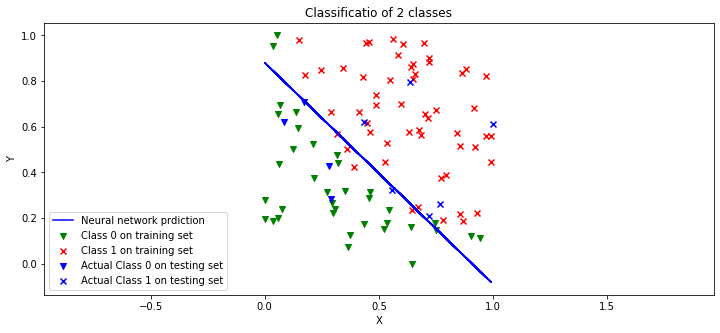

In [135]:
#plot results
df_training = pd.DataFrame({"X":x_train[:,0],"Y":x_train[:,1],'Label':y_train})
df_testing = pd.DataFrame({"X":x_test[:,0],"Y":x_test[:,1],'Label':y_test})

group0 = df_training[df_training['Label']==0]
group1 = df_training[df_training['Label']==1]
group0_test = df_testing[df_testing['Label']==0]
group1_test = df_testing[df_testing['Label']==1]

plt.figure(figsize=(12,5))
plt.title("Classificatio of 2 classes")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.scatter(group0['X'],group0['Y'],marker='v',c='g',label='Class 0 on training set')
plt.scatter(group1['X'],group1['Y'],marker='x',c='r',label='Class 1 on training set')
plt.legend(loc='upper right')
plt.plot(df_training['X'].values,(theta0+theta1*df_training['X'].values)/((-1)*theta2),'-b',label="Neural network prdiction")
plt.scatter(group0_test['X'],group0_test['Y'],marker='v',c='b',label='Actual Class 0 on testing set')
plt.scatter(group1_test['X'],group1_test['Y'],marker='x',c='b',label='Actual Class 1 on testing set')
plt.legend(loc="lower left")
plt.show()


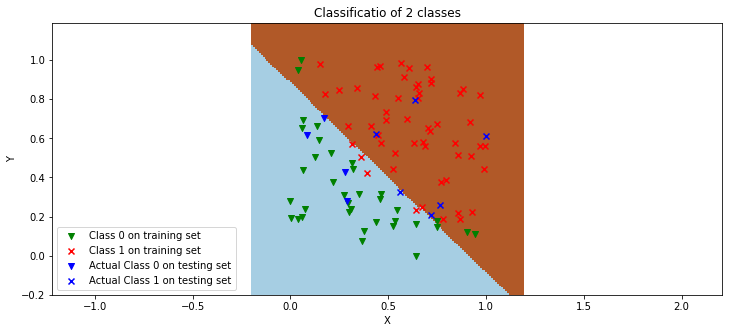

In [136]:
#plot results
df_training = pd.DataFrame({"X":x_train[:,0],"Y":x_train[:,1],'Label':y_train})
df_testing = pd.DataFrame({"X":x_test[:,0],"Y":x_test[:,1],'Label':y_test})

group0 = df_training[df_training['Label']==0]
group1 = df_training[df_training['Label']==1]
group0_test = df_testing[df_testing['Label']==0]
group1_test = df_testing[df_testing['Label']==1]

plt.figure(1,figsize=(12,5))
plt.title("Classificatio of 2 classes")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')

x_min,x_max = -0.2,1.2
y_min,y_max = -0.2,1.2
h = 0.01
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z = (modelNN_logistic.predict(np.c_[xx.ravel(),yy.ravel()])>0.5).astype('int32')

Z = Z.reshape(xx.shape)
# plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

plt.scatter(group0['X'],group0['Y'],marker='v',c='g',label='Class 0 on training set')
plt.scatter(group1['X'],group1['Y'],marker='x',c='r',label='Class 1 on training set')
plt.legend(loc='upper right')
#plt.plot(df_training['X'].values,(model_logistic.intercept_[0]+model_logistic.coef_[0][0]*df_training['X'].values)/((-1)*model_logistic.coef_[0][1]),'-b',label="Logistic regression prdiction")
plt.scatter(group0_test['X'],group0_test['Y'],marker='v',c='b',label='Actual Class 0 on testing set')
plt.scatter(group1_test['X'],group1_test['Y'],marker='x',c='b',label='Actual Class 1 on testing set')
plt.legend(loc="lower left")
plt.show()

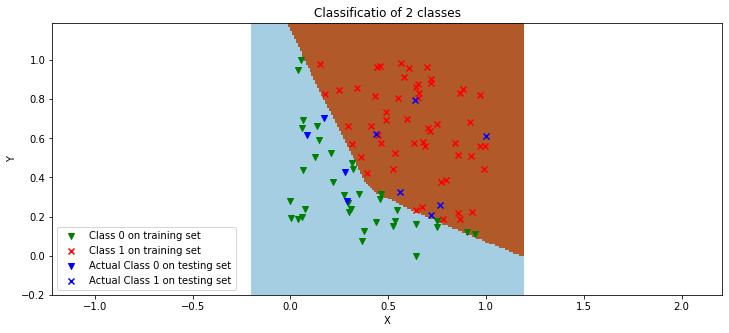

In [137]:
#plot results
df_training = pd.DataFrame({"X":x_train[:,0],"Y":x_train[:,1],'Label':y_train})
df_testing = pd.DataFrame({"X":x_test[:,0],"Y":x_test[:,1],'Label':y_test})

group0 = df_training[df_training['Label']==0]
group1 = df_training[df_training['Label']==1]
group0_test = df_testing[df_testing['Label']==0]
group1_test = df_testing[df_testing['Label']==1]

plt.figure(1,figsize=(12,5))
plt.title("Classificatio of 2 classes")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')

x_min,x_max = -0.2,1.2
y_min,y_max = -0.2,1.2
h = 0.01
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z = (modelNN.predict(np.c_[xx.ravel(),yy.ravel()])>0.5).astype('int32')

Z = Z.reshape(xx.shape)
# plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

plt.scatter(group0['X'],group0['Y'],marker='v',c='g',label='Class 0 on training set')
plt.scatter(group1['X'],group1['Y'],marker='x',c='r',label='Class 1 on training set')
plt.legend(loc='upper right')
#plt.plot(df_training['X'].values,(model_logistic.intercept_[0]+model_logistic.coef_[0][0]*df_training['X'].values)/((-1)*model_logistic.coef_[0][1]),'-b',label="Logistic regression prdiction")
plt.scatter(group0_test['X'],group0_test['Y'],marker='v',c='b',label='Actual Class 0 on testing set')
plt.scatter(group1_test['X'],group1_test['Y'],marker='x',c='b',label='Actual Class 1 on testing set')
plt.legend(loc="lower left")
plt.show()

In [138]:
#Predict on training set
y_pred0 =  (modelNN_logistic.predict(x_train)>0.5).astype('int32')
y_pred1 =  (modelNN.predict(x_train)>0.5).astype('int32')

In [139]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report of Neural network-logistic model\n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred0))
print("Confusion matrix of Neural network-logistic model\n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred0))

Classification report of Neural network-logistic model
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.91      0.93      0.92        54

    accuracy                           0.90        90
   macro avg       0.90      0.89      0.90        90
weighted avg       0.90      0.90      0.90        90

Confusion matrix of Neural network-logistic model
[[31  5]
 [ 4 50]]


In [140]:
print("Classification report of Neural network model\n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred1))
print("Confusion matrix of Neural network model\n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred1))

Classification report of Neural network model
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.93      1.00      0.96        54

    accuracy                           0.96        90
   macro avg       0.97      0.94      0.95        90
weighted avg       0.96      0.96      0.96        90

Confusion matrix of Neural network model
[[32  4]
 [ 0 54]]


In [141]:
# Compute confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
  
  plt.figure(figsize=(5,5))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = 'd' 
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  

<Figure size 432x288 with 0 Axes>

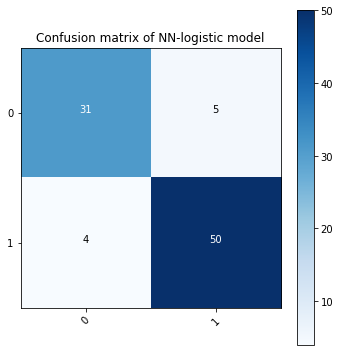

<Figure size 432x288 with 0 Axes>

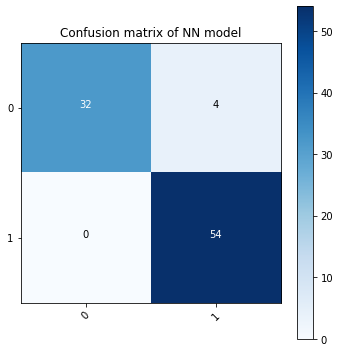

In [142]:
class_names = list(set(y_train))
#Confusion matrix of Neural network-logistic model
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred0)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix of NN-logistic model')
#Confusion matrix of Neural network model
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix of NN model')

In [143]:
#Predictions on the test set
y_pred0 =  (modelNN_logistic.predict(x_test)>0.5).astype('int32')
y_pred1 =  (modelNN.predict(x_test)>0.5).astype('int32')

In [144]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report of Neural network-logistic model\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred0))
print("Confusion matrix of Neural network-logistic model\n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred0))

Classification report of Neural network-logistic model
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10

Confusion matrix of Neural network-logistic model
[[4 0]
 [1 5]]


In [145]:
print("Classification report of Neural network model\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred1))
print("Confusion matrix of Neural network model\n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred1))

Classification report of Neural network model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion matrix of Neural network model
[[4 0]
 [0 6]]


<Figure size 432x288 with 0 Axes>

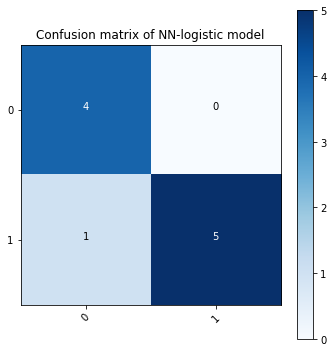

<Figure size 432x288 with 0 Axes>

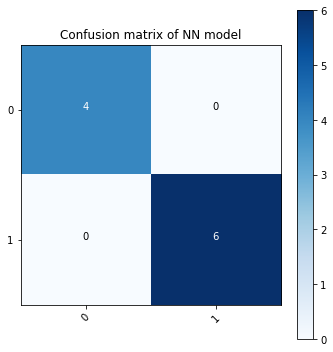

In [146]:
class_names = list(set(y_test))
#Confusion matrix of Neural network-logistic model
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred0)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix of NN-logistic model')
#Confusion matrix of Neural network model
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix of NN model')